<a href="https://colab.research.google.com/github/FilippoCasellini/2024_Intro_Python/blob/main/fcasellini_exercices_W2_S1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (Exercise) Ocean Floats Data Analysis

**Learning Objectives**

*    Creating new arrays using `linspace` and `arange`
*    Computing basic formulas with `numpy` arrays
*    Loading data from `.npy` files
*    Performing reductions (e.g. `mean`, `std` on `numpy` arrays)
*    Making 1D line plots
*    Making scatterplots
*    Annotating plots with titles and axes

In this problem, we use real data from ocean profiling floats. [ARGO](http://www.argo.ucsd.edu/) floats are autonomous robotic instruments that collect Temperature, Salinity, and Pressure data from the ocean. [ARGO](http://www.argo.ucsd.edu/) floats collect one “profile” (a set of messurements at different depths or “levels”).

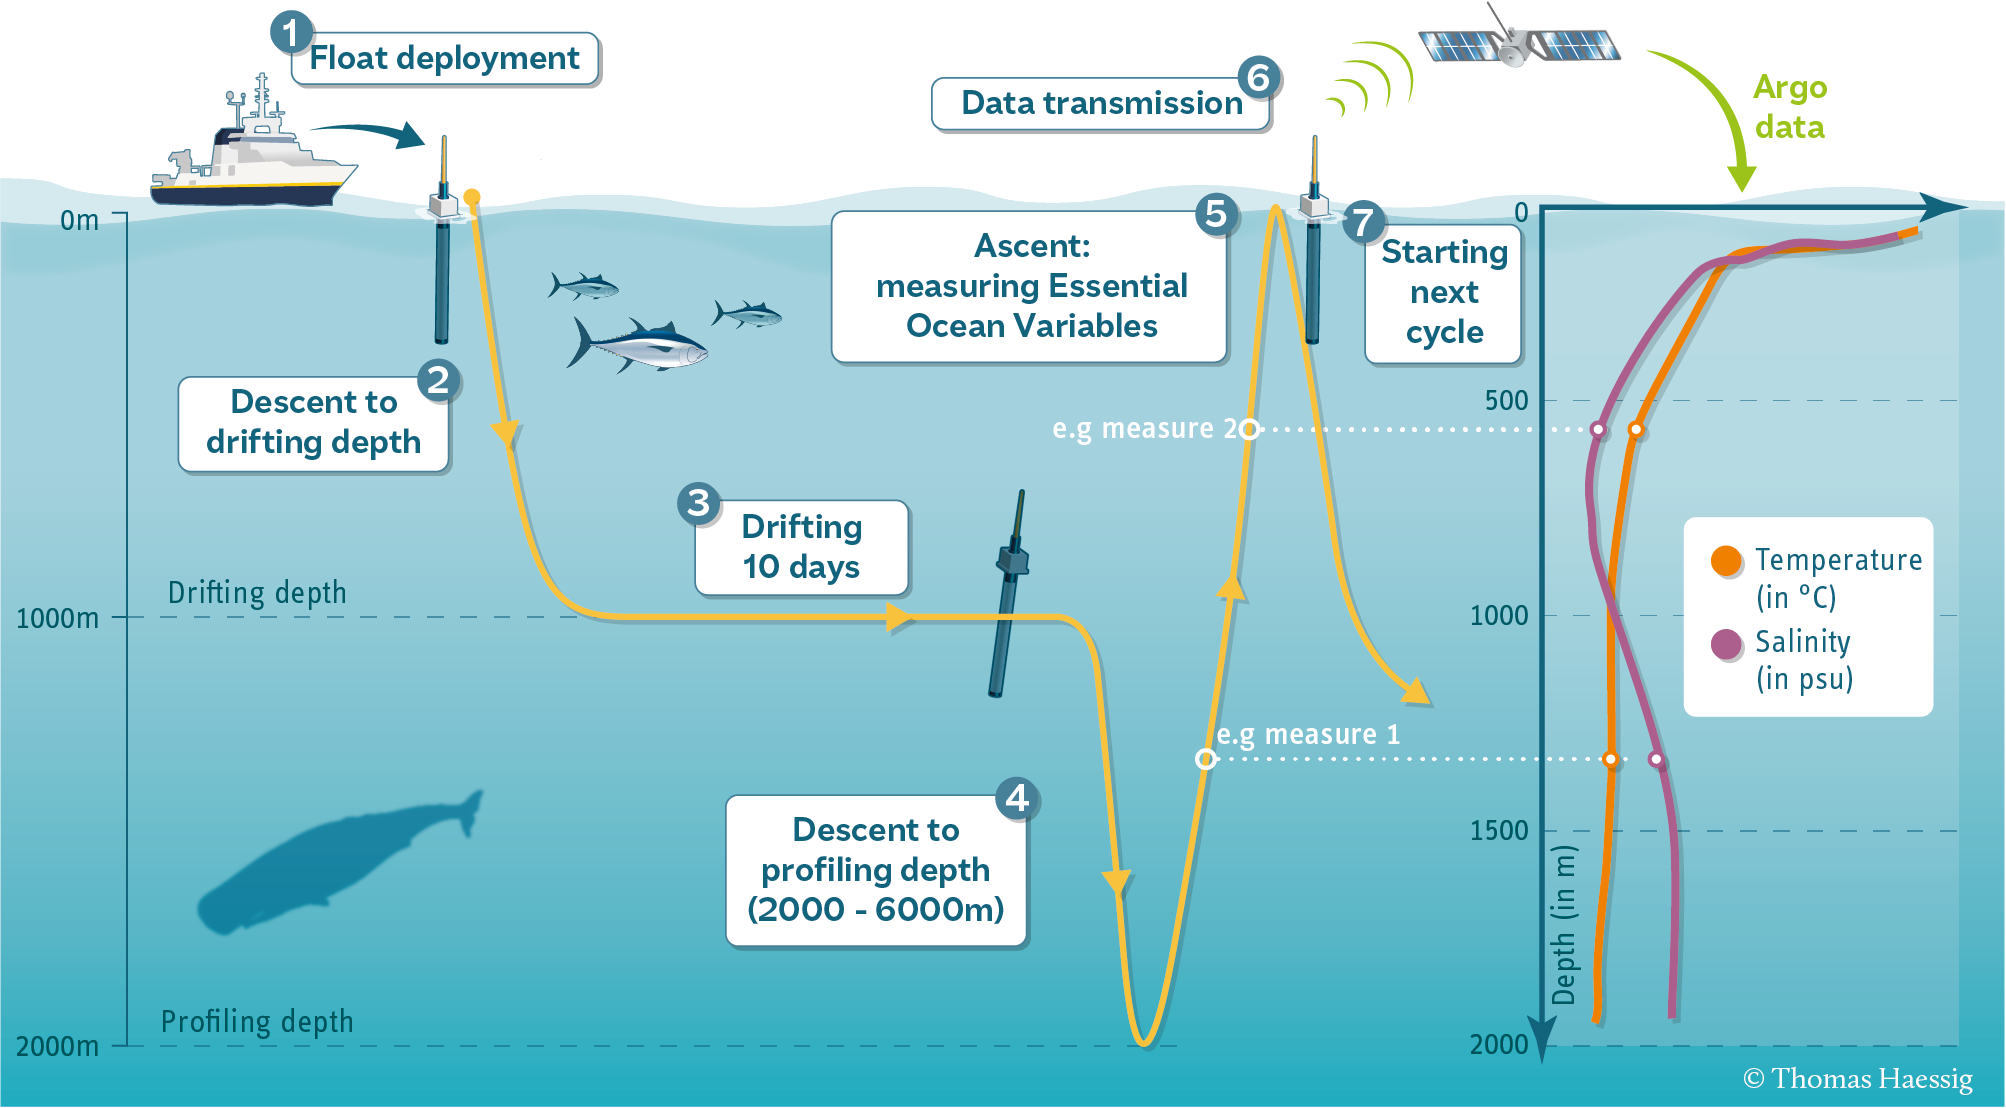


Each profile has a single latitude, longitude, and date associated with it, in addition to many different levels.

Let’s start by using [pooch](https://www.fatiando.org/pooch/latest/) to download the data files we need for this exercise. The following code will give you a list of `.npy` files that you can open in the next step.

In [1]:
import pooch

url = "https://unils-my.sharepoint.com/:u:/g/personal/tom_beucler_unil_ch/EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ?download=1"
files = pooch.retrieve(url, processor=pooch.Unzip(), known_hash='2a703c720302c682f1662181d329c9f22f9f10e1539dc2d6082160a469165009')
files

Unzipping contents of '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ' to '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip'


['/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lon.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/levels.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/P.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/date.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/S.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/T.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lat.npy']

In [2]:
import numpy as np

**Q1) Load each data file as a `numpy` array.**

You can use whatever names you want for your arrays, but we recommend:

`T`: temperature

`S`: salinity

`P`: pressure

`date`: date

`lat`: latitude

`lon`: longitude

`level`: depth level

Hint 1: Look at the file name (the items in `files`) to know which files corresponds to which variable.

Hint 2: Check out the documentation for [`np.load`](https://numpy.org/doc/stable/reference/generated/numpy.load.html).

Display the names of the items in files here

In [3]:
file_names = ['/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/S.npy',
              '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/levels.npy',
              '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/P.npy',
              '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lat.npy',
              '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lon.npy',
              '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/T.npy',
              '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/date.npy']


Then, load the files as `numpy` arrays, for instance using list comprehension

In [4]:
S, level, P, lat, lon, T, date = [np.load(file) for file in file_names]

**Q2) Recreate the `level` array using `np.arange` and `np.linspace`**

Hints:

*   The documentation for `np.arange` is [at this link](https://numpy.org/devdocs/reference/generated/numpy.arange.html)
*   The documentation for `np.linspace` is [at this link](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)
*   The documentation for `np.testing.assert_equal` is [at this link](https://numpy.org/doc/stable/reference/generated/numpy.testing.assert_equal.html)

Display the `level` array

In [5]:
print(level)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77]


Recreate the `level` array using `np.arange` and call it `level_arange`

In [6]:
level_arange = np.arange(0,78)
print(level_arange)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77]


Check that `level` and `level_arange` are equal using `np.testing.assert_equal`

In [7]:
np.testing.assert_equal(level,level_arange)

Recreate the `level` array using `np.linspace` and call it `level_linspace`

In [8]:
level_linspace = np.linspace(0,77,78)
print(level_linspace)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77.]


Check that `level` and `level_linspace` are equal using `np.testing.assert_equal`

In [9]:
np.testing.assert_equal(level,level_linspace)

**Q3) Examine the shapes of `T`, `S` and `P` compared to `lon`, `lat`, `date` and `level`. How do you think they are related?**

Hint: Check out the [NDArrays subsection](#NDArrays)

Display the shapes of all loaded variables

In [12]:
print(T.shape)
print(S.shape)
print(P.shape)

(78, 75)
(78, 75)
(78, 75)


In [13]:
print(lon.shape)
print(lat.shape)
print(date.shape)
print(level.shape)

(75,)
(75,)
(75,)
(78,)


Based on the shapes, which dimensions do you think are shared among the arrays?

Based on the shapes the x dimensions are shared among the arrays.

**Q4) Based on the formula below, calculate the seawater density `relative_density`, relative to pure water, as a function of the temperature, the salinity, and the pressure.**

`relative_density`$ = ρ −ρ_{Pure\ Water} = a \times S +b \times \Theta + c \times \Theta^{2}$

where:

*    The densities $\rho$ and $ρ_{Pure\ Water}$ are in units $kg/m^{3}$.
*    The constants $a$, $b$, and $c$ are provided below.
*    The function to calculate the conservative temperature $\Theta$ (in units Celcius) from temperature, salinity, and pressure is provided below.
*    The temperature $T$ is in units Celcius.
*    The salinity $S$ is in units $g/kg$.
*    The pressure $p$ is in units $dbar$.

Hint: The loaded `numpy` arrays `temperature`, `salinity`, and `pressure` already have the right units and no conversion is needed.

Sources:

1) [*Roquet, Fabien, et al. "Defining a simplified yet “realistic” equation of state for seawater." Journal of Physical Oceanography 45.10 (2015): 2564-2579.*](https://journals.ametsoc.org/view/journals/phoc/45/10/jpo-d-15-0080.1.xml)

2) [*The Gibbs SeaWater (GSW)
Oceanographic Toolbox of TEOS-10*](https://www.teos-10.org/pubs/gsw/html/gsw_front_page.html). [(License)](https://www.teos-10.org/pubs/gsw/html/gsw_licence.html)

Below are the constants a, b, and c:

In [14]:
a = 7.718e-1
b = -8.44e-2
c = -4.561e-3

Let's import the library [`gsw`](https://teos-10.github.io/GSW-Python/) that contains the function `CS_from_t`to calculate the conservative temperature $\Theta$ from temperature, salinity, and pressure.

In [15]:
!pip install gsw
from gsw import CT_from_t

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 9.2 MB/s eta 0:00:00


Now it's all up to you. Here's the equation to avoid having to scroll back up:

`relative_density`$ = ρ −ρ_{Pure\ Water} = a \times S +b \times \Theta + c \times \Theta^{2}$

Calculate the conservative temperature

Hint: use [CT_from_t](https://www.teos-10.org/pubs/gsw/html/gsw_CT_from_t.html)

In [16]:
 CT = CT_from_t(T,S,P)

Calculate the `relative density` using the equation above

In [17]:
relative_density = a*S + b*CT + c*(CT**2)
print(relative_density)

[[18.36152674 18.3074983  18.34127024 ... 18.42715875 18.4688042
  18.39582104]
 [18.35542645 18.30967596 18.34171541 ... 18.41076618 18.35303668
  18.39580282]
 [18.36486576 18.31092749 18.34153802 ... 18.40115878 18.37679112
  18.39475388]
 ...
 [18.01515787 18.01831722 18.01809242 ... 18.02192599 18.02417064
  18.02719533]
 [18.02012438 18.0232203  18.02208142 ... 18.02588673 18.0270666
  18.03067945]
 [18.02598386 18.02798095 18.02760444 ...         nan 18.03207863
          nan]]


**Q4) Make a plot for each column of data in `T`, `S`, `P`, and
`relative_density` (four plots)**

For this question, we have to use the [Pyplot interface](https://matplotlib.org/stable/tutorials/introductory/pyplot.html) of the [Matplotlib library](https://matplotlib.org/) for visualization even if we have not covered it extensively in class yet. But fear not as we provide easy-to-follow instructions below. 😊

The first step is to import Pyplot. Simply execute the code below.

In [18]:
import matplotlib.pyplot as plt

Then, we will plot variables as a function of the ocean depth, `level`. Simply read the documentation [at this link](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) to infer the correct syntax. Label your axes using `plt.xlabel` and `plt.ylabel`, and add a title using `plt.title`.

Hint: The vertical scale should use the `level` data to be consistent with oceanographic conventions.

Hint 2: Each plot should have a line for each column of data. It will look messy, like the plot below:

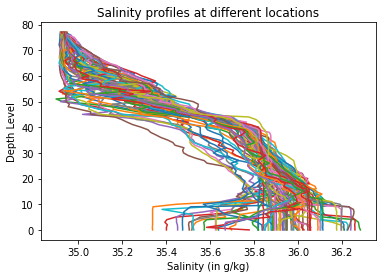

Text(0.5, 1.0, 'Temperature profiles at different depths level')

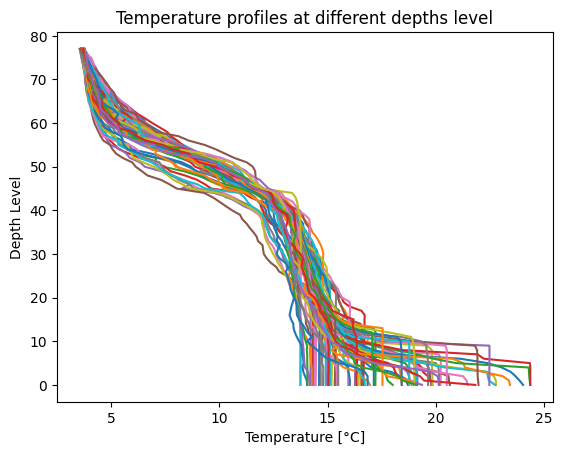

In [20]:
plt.plot(T,level); # The semi-colon prevents printing the line objects
plt.xlabel('Temperature [°C]') # Takes a string as argument
plt.ylabel('Depth Level')
plt.title('Temperature profiles at different depths level')

Make more plots below:

Text(0.5, 1.0, 'Salinity profiles at different depths level')

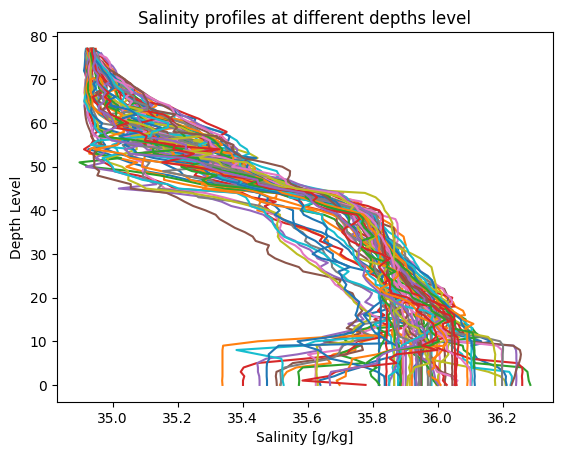

In [22]:
plt.plot(S,level); # The semi-colon prevents printing the line objects
plt.xlabel('Salinity [g/kg]') # Takes a string as argument
plt.ylabel('Depth Level')
plt.title('Salinity profiles at different depths level')

Text(0.5, 1.0, 'Pressure profiles at different depths level')

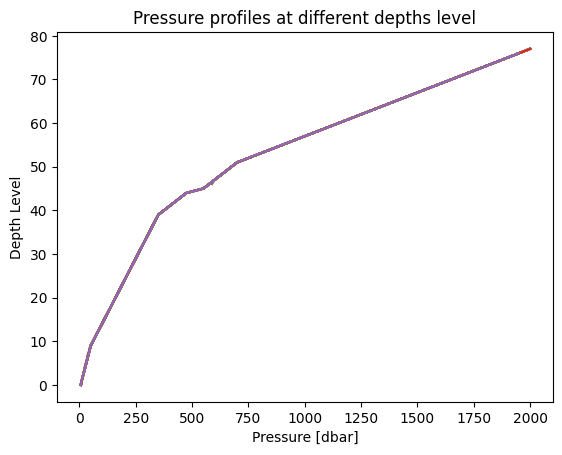

In [23]:
plt.plot(P,level); # The semi-colon prevents printing the line objects
plt.xlabel('Pressure [dbar]') # Takes a string as argument
plt.ylabel('Depth Level')
plt.title('Pressure profiles at different depths level')

Text(0.5, 1.0, 'Relative density profiles at different depths level')

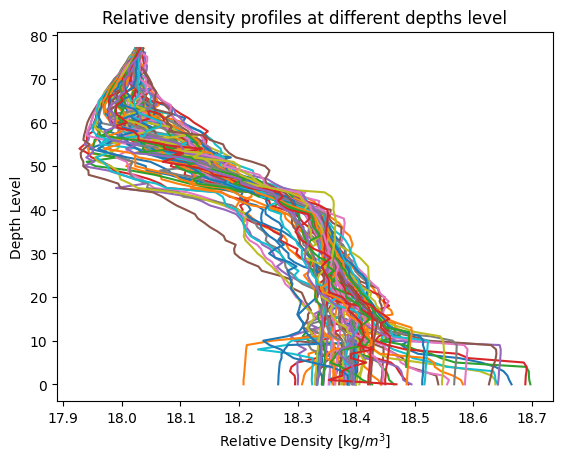

In [24]:
plt.plot(relative_density,level); # The semi-colon prevents printing the line objects
plt.xlabel('Relative Density [kg/$m^3$]') # Takes a string as argument
plt.ylabel('Depth Level')
plt.title('Relative density profiles at different depths level')

**Q5) Compute the mean and standard deviation of each of `T`, `S`, `P`, and `seawater_density` at each depth in `level`.**

Hint: You may want to read the documentation at [this link](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) and [this link](https://numpy.org/doc/stable/reference/generated/numpy.std.html).

Hint 2: You can check that you took the mean and standard deviations along the correct axes by checking the `shape` of your results.

Compute the means...

In [28]:
T_mean = np.mean(T,axis=1)
print(T_mean)

[        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan 10.80430666 10.49702667
 10.1749066   9.83453334  9.48625332  9.19793334  8.66010666  8.12324001
  7.60221333  7.15289333  6.74250667  6.39543999  6.04598667  5.74538665
  5.48913333  5.26604001  5.08768     4.93479998  4.77769334  4.65368
  4.54237334  4.44274664  4.35933333         nan         nan         nan
         nan         nan         nan         nan         nan         nan]


In [29]:
S_mean = np.mean(S,axis=1)
print(S_mean)
P_mean = np.mean(P,axis=1)
print(P_mean)
S_mean = np.mean(S,axis=1)
print(S_mean)
relative_density_mean = np.mean(relative_density,axis=1)
print(relative_density_mean)

[        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan 35.41392634 35.3810557
 35.34845245 35.31531555 35.28392568 35.26568334 35.2389473  35.21583745
 35.19686081 35.18231257 35.1648436  35.15073542 35.12509338 35.10155869
 35.08199799 35.06317012 35.0490097  35.03678253 35.02174266 35.01135579
 35.00212936 34.99386297 34.98810328         nan         nan         nan
         nan         nan         nan         nan         nan         nan]
[   6.43466671           nan           nan         

... and the standard deviations.

In [30]:
T_std = np.std(T,axis=1)
print(T_std)
P_std = np.std(P,axis=1)
print(P_std)
S_std = np.std(S,axis=1)
print(S_std)
relative_density_std = np.std(relative_density,axis=1)
print(relative_density_std)


[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan 0.84204226 0.90031954
 0.94661515 0.9902255  1.01786435 1.01690775 1.01944275 0.97987767
 0.94359878 0.88207755 0.82934499 0.7859263  0.71755907 0.68351183
 0.64382025 0.58990336 0.55077313 0.50187175 0.45673872 0.4085324
 0.36748504 0.33272584 0.2996815         nan        nan        nan
        nan        nan        nan        nan        nan        nan]
[0.8534625         nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan       

Check that they have the same shape as your vertical level `lev` coordinate:

In [38]:
np.testing.assert_equal(T_mean.shape,level.shape)
np.testing.assert_equal(S_mean.shape,level.shape)
np.testing.assert_equal(P_mean.shape,level.shape)
np.testing.assert_equal(relative_density_mean.shape,level.shape)

np.testing.assert_equal(relative_density_std.shape,level.shape)
np.testing.assert_equal(relative_density_std.shape,level.shape)
np.testing.assert_equal(relative_density_std.shape,level.shape)
np.testing.assert_equal(relative_density_std.shape,level.shape)

**Q6) Now make similar plots, but show only the mean `T`, `S`, `P`, and `seawater_density` at each depth. Show error bars on each plot using the standard deviations.**

Hint: If you are feeling adventurous, you can directly use the [`plt.errorbar`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html) function.

Hint 2: You should get plots similar to the one below

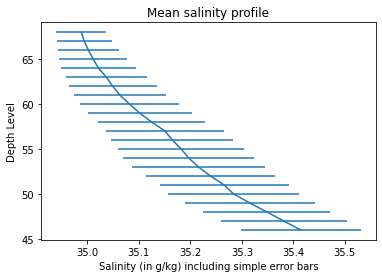

Text(0.5, 1.0, 'Mean temperature profile')

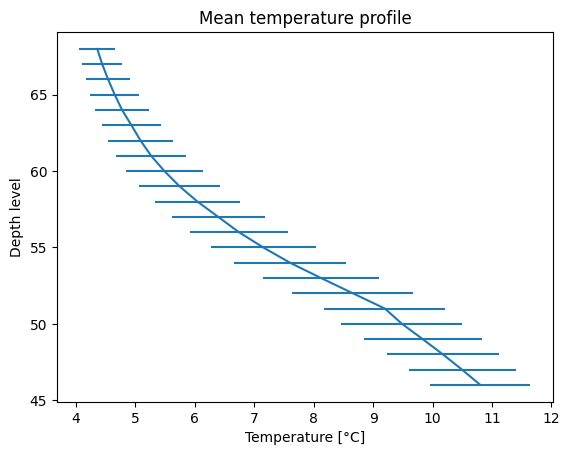

In [32]:
plt.errorbar(T_mean,level,xerr=T_std)
plt.xlabel('Temperature [°C]')
plt.ylabel('Depth level')
plt.title('Mean temperature profile')

Three more plots and we'll be all set! 🙂

Text(0.5, 1.0, 'Mean salinity profile')

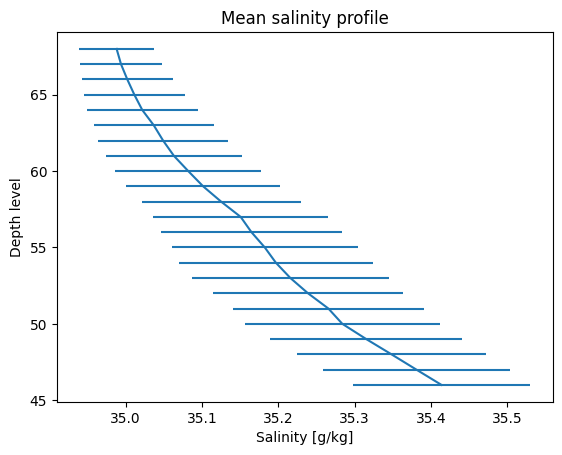

In [34]:
plt.errorbar(S_mean,level,xerr=S_std)
plt.xlabel('Salinity [g/kg]')
plt.ylabel('Depth level')
plt.title('Mean salinity profile')

Text(0.5, 1.0, 'Mean pressure profile')

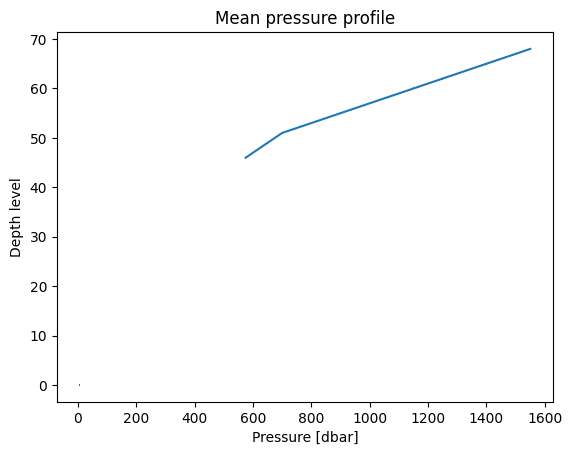

In [35]:
plt.errorbar(P_mean,level,xerr=P_std)
plt.xlabel('Pressure [dbar]')
plt.ylabel('Depth level')
plt.title('Mean pressure profile')

Text(0.5, 1.0, 'Mean relative density profile')

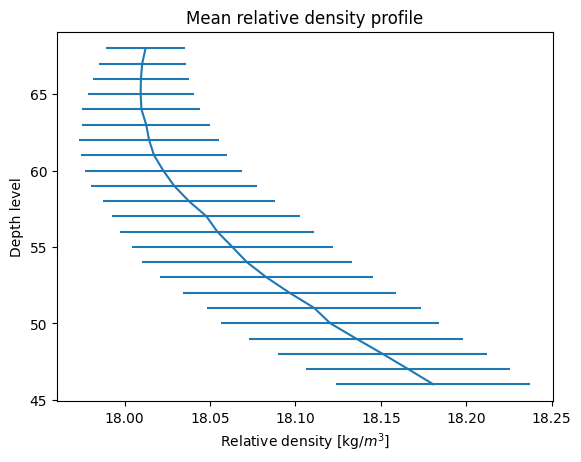

In [36]:
plt.errorbar(relative_density_mean,level,xerr=relative_density_std)
plt.xlabel('Relative density [kg/$m^3$]')
plt.ylabel('Depth level')
plt.title('Mean relative density profile')

**Q7) Account For Missing Data**

The profiles contain many missing values. These are indicated by the special “Not a Number” value, or `np.nan`.

When you take the mean or standard deviation of data with NaNs in it, the entire result becomes `NaN`. Instead, if you use the special functions `np.nanmean` and `np.nanstd`, you tell NumPy to ignore the NaNs.

Recalculate the means and standard deviations as in the previous sections using these functions and plot the results.

Hint: Links to the [`np.nanmean` documentation](https://numpy.org/doc/stable/reference/generated/numpy.nanmean.html) and the [`np.nanstd` documentation](https://numpy.org/doc/stable/reference/generated/numpy.nanstd.html).

Recalculate the means below ignoring the missing values. We trust that you can now come up with the full syntax yourself 😎

In [39]:
T_mean_nan = np.nanmean(T,axis=1)
print(T_mean_nan)
S_mean_nan = np.nanmean(S,axis=1)
print(S_mean_nan)
P_mean_nan = np.nanmean(P,axis=1)
print(P_mean_nan)
relative_density_mean_nan = np.nanmean(relative_density,axis=1)
print(relative_density_mean_nan)

[17.60172602 17.57223609 17.5145833  17.42326395 17.24943838 17.03730134
 16.76787661 16.44609588 16.17439195 16.04501356 15.65827023 15.4607296
 15.26114862 15.12489191 14.99133783 14.90160808 14.81990544 14.74535139
 14.66822971 14.585027   14.49732434 14.41904053 14.35412163 14.27102702
 14.19081082 14.11487838 14.04347293 13.98067566 13.90994595 13.83274319
 13.76139196 13.69836479 13.62335132 13.54185131 13.46647295 13.39395946
 13.32541891 13.25205403 13.18131082 13.10233782 12.89268916 12.67795943
 12.4649189  12.2178513  11.98270268 11.1281081  10.80430666 10.49702667
 10.1749066   9.83453334  9.48625332  9.19793334  8.66010666  8.12324001
  7.60221333  7.15289333  6.74250667  6.39543999  6.04598667  5.74538665
  5.48913333  5.26604001  5.08768     4.93479998  4.77769334  4.65368
  4.54237334  4.44274664  4.35933333  4.2653784   4.17290539  4.08902703
  3.99864865  3.92163514  3.85617567  3.78916217  3.72950001  3.66207691]
[35.9063218  35.90223138 35.90313435 35.90173139 35.90

Similarly, recalculate the standard deviations ignoring the missing values.

In [40]:
T_std_nan = np.nanstd(T,axis=1)
print(T_std_nan)
P_std_nan = np.nanstd(P,axis=1)
print(P_std_nan)
S_std_nan = np.nanstd(S,axis=1)
print(S_std_nan)
relative_density_std_nan = np.nanstd(relative_density,axis=1)
print(relative_density_std_nan)

[2.92500898 2.86405591 2.83324563 2.75112353 2.60248422 2.42649165
 2.20220589 1.99752543 1.79105862 1.74132795 1.26608465 1.07857596
 0.89761236 0.79748479 0.68525328 0.6394096  0.61835635 0.59387877
 0.56010736 0.55009107 0.53183794 0.52634089 0.52668259 0.51009182
 0.49376838 0.48980214 0.48551874 0.48516171 0.49244536 0.50557331
 0.50881718 0.50482633 0.50093284 0.51411271 0.50962002 0.51399949
 0.52544584 0.53182873 0.5466501  0.55060902 0.56066216 0.57937588
 0.5989958  0.63392862 0.70640057 0.85775269 0.84204226 0.90031954
 0.94661515 0.9902255  1.01786435 1.01690775 1.01944275 0.97987767
 0.94359878 0.88207755 0.82934499 0.7859263  0.71755907 0.68351183
 0.64382025 0.58990336 0.55077313 0.50187175 0.45673872 0.4085324
 0.36748504 0.33272584 0.2996815  0.25570195 0.21802589 0.17365755
 0.14408683 0.11509768 0.09214697 0.08062746 0.06846311 0.06550644]
[0.8534625  0.37341592 0.38353723 0.36770566 0.55606262 0.50754902
 0.42492636 0.6317751  0.48483957 0.65125039 0.40346418 0.4673

Text(0.5, 1.0, 'Mean temperature profile')

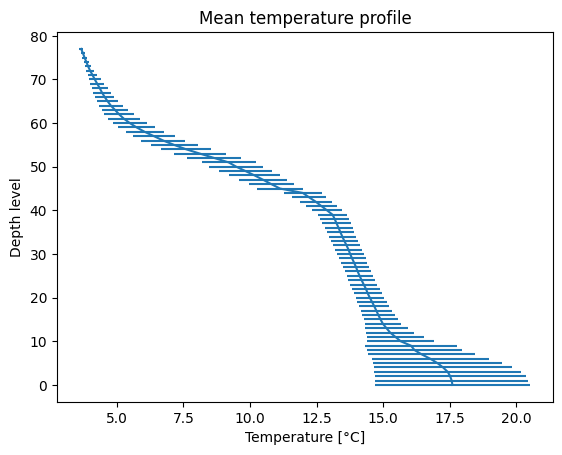

In [41]:
plt.errorbar(T_mean_nan,level,xerr=T_std_nan)
plt.xlabel('Temperature [°C]')
plt.ylabel('Depth level')
plt.title('Mean temperature profile')

Text(0.5, 1.0, 'Mean salinity profile')

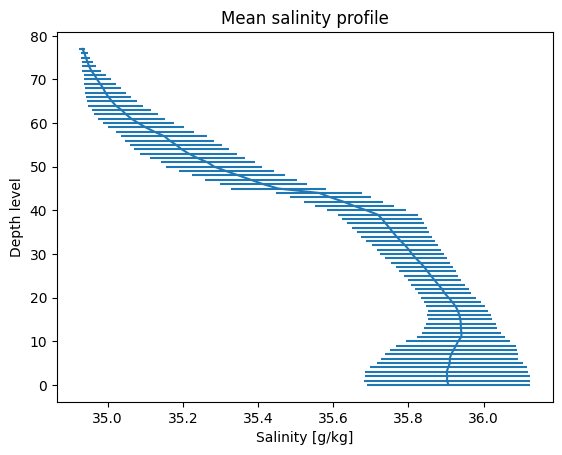

In [42]:
plt.errorbar(S_mean_nan,level,xerr=S_std_nan)
plt.xlabel('Salinity [g/kg]')
plt.ylabel('Depth level')
plt.title('Mean salinity profile')

Text(0.5, 1.0, 'Mean pressure profile')

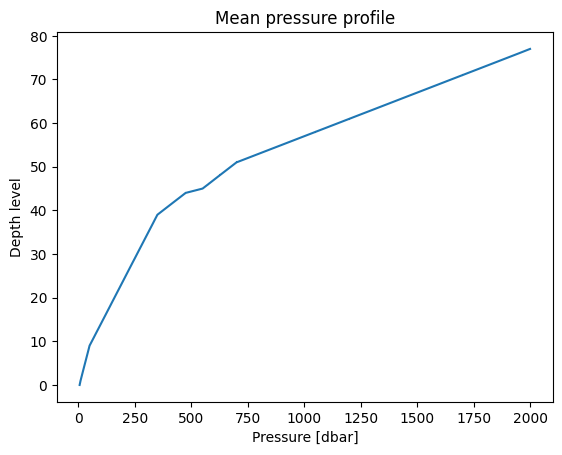

In [43]:
plt.errorbar(P_mean_nan,level,xerr=P_std_nan)
plt.xlabel('Pressure [dbar]')
plt.ylabel('Depth level')
plt.title('Mean pressure profile')

Text(0.5, 1.0, 'Mean relative density profile')

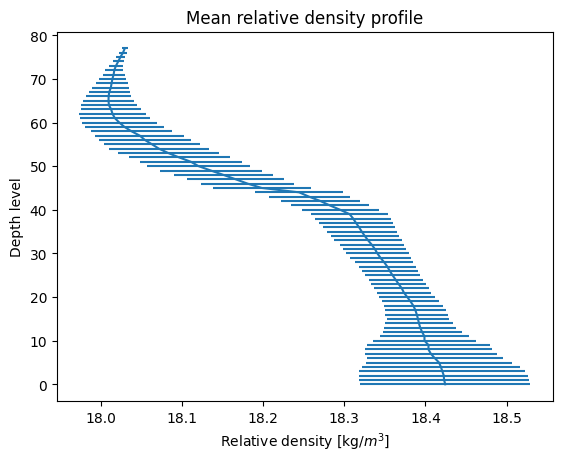

In [44]:
plt.errorbar(relative_density_mean_nan,level,xerr=relative_density_std_nan)
plt.xlabel('Relative density [kg/$m^3$]')
plt.ylabel('Depth level')
plt.title('Mean relative density profile')

**Q8) Create a scatter plot of the longitudinal (`lon`) and latitudinal (`lat`) coordinates of the ARGO floats.**

Again, we have not discussed it in the tutorial, but there is a really convenient scatter plot function called [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) provided by the Pyplot interface.

Bonus: Label your figure using `plt.xlabel`, `plt.ylabel`, and `plt.title`.

Bonus 2: Increase the fontsize of your labels by adding a `fontsize=` argument to the label functions.

Bonus 3: Make your scatter plot beautiful by changing the arguments of [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) listed in the documentation, for example `s=`.

Text(0.5, 1.0, 'Coordinates of the ARGO floats')

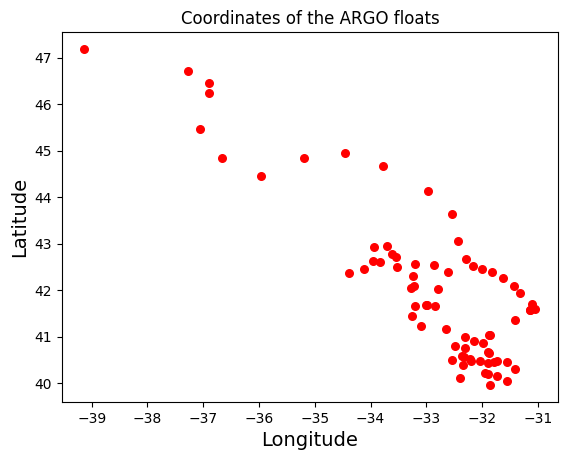

In [45]:
plt.scatter(lon,lat,s=30,c='r')
plt.xlabel('Longitude',fontsize = 14)
plt.ylabel('Latitude',fontsize = 14)
plt.title('Coordinates of the ARGO floats')